<a href="https://colab.research.google.com/github/josevanito/repo_exemplo2/blob/main/projeto4_0_PROJETO_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **                  ANÁLISE DE FRAUDES DE CARTÃO DE CREDITO**



---



# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos .

<p align=center>
<img src="https://as2.ftcdn.net/v2/jpg/01/41/63/29/1000_F_141632957_HDXO8xCLe0CmZTpPhszQxgcRAQs80TZ7.jpg" width="60%"></p>

Essas fraudes são aquelas envolvendo cartões de crédito e são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.
Vamos importar alguns dados para fazemos uma análise nesse projeto.Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européia de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por  [V1,V2,V3…,V28]
<p align=center>
<img src="https://as2.ftcdn.net/v2/jpg/02/78/15/57/1000_F_278155747_PHsKuQsvyi7FB0YcIDSB1imj58xbmtH1.jpg" width="60%"></p>



 AS variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).
 A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações.

### **Então vamos importar dados**

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
!pip install -q scikit-plot

## importar os pacotes necessários

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
sns.set_style('dark')

In [ ]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)
print("Dimensões do Conjunto Original: ", df.shape)
test = df.sample(frac=0.15, random_state=0)
df = df.drop(test.index)
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Com os dados importados e separados dentro de uma estrutura DataFrame ,vamos para ***  Análise Exploratória***

AS 05 primeiras entradas e veremos um resumo da estartíticas  e se há  valores  ausentes. 

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos,tambem vamos ver a decrição dos dados.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum().max()

0

Quanto à qualidade do *dataset*, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza. Na função abaixo, perceba que o maior valor por coluna para valores nulos é zero, o que confirma que não há valores ausentes.

Com essa análise, podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a colunaTime`.

Em relação à variável Amount, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado

0    241668
1       418
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

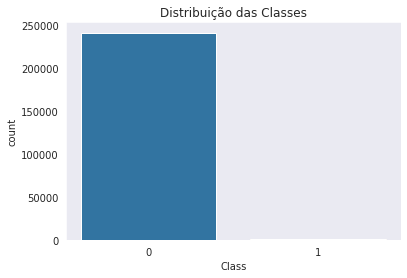

In [ ]:
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Como é informado na descrição dos dados, as entradas relativas à transações fraudulentas correspondem a 0,17% do total.



Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (Time). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

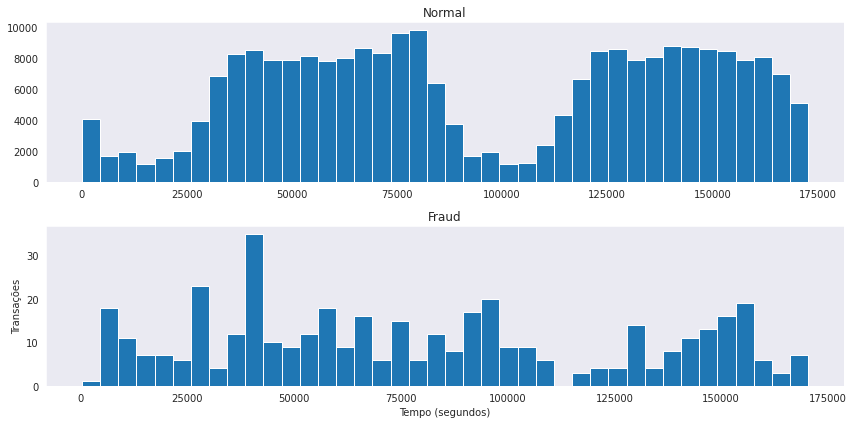

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

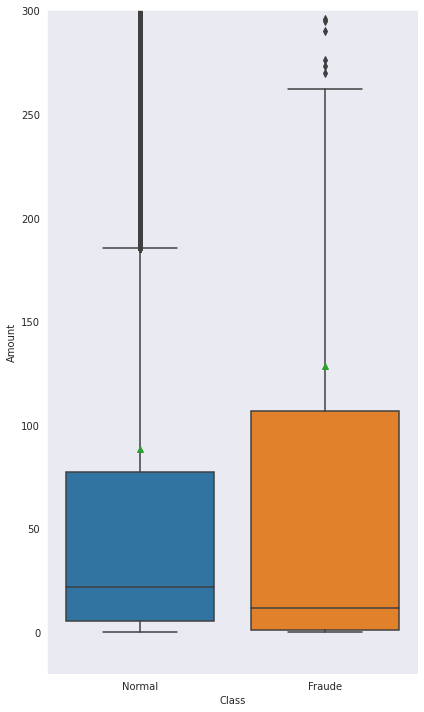

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 300))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

In [ ]:
df['Amount'][df['Class']==1].describe().round(2)

count     418.00
mean      128.50
std       267.73
min         0.00
25%         1.00
50%        11.86
75%       106.81
max      2125.87
Name: Amount, dtype: float64

As informações estatísticas para `df.Class == 1` mostram que a sua média exata está em 123.70 e a mediana em 11.40.

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

# Média das transações#

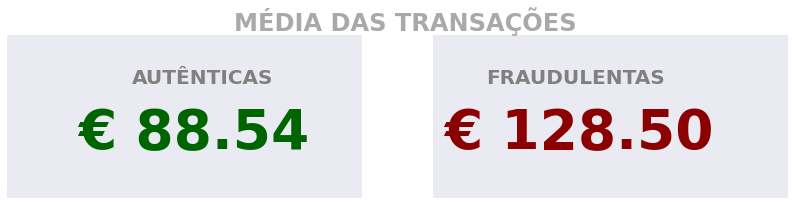

In [ ]:
media_autentica = df['Amount'][df['Class']==0].mean()
media_fraude    = df['Amount'][df['Class']==1].mean()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
fig.text(x= 0.35, y= 0.9 ,s='MÉDIA DAS TRANSAÇÕES',
        fontsize=24, color='darkgray', weight='bold')
ax1.text(x= 0.35, y= 0.7 ,s='AUTÊNTICAS',
        fontsize=20, color='gray', weight='bold')
ax1.text(x= 0.2, y= 0.3 ,s=f'€ {media_autentica:.2f}', fontsize=55, color='darkgreen', weight='bold')

ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.text(x= 0.15, y= 0.7 ,s='FRAUDULENTAS',
        fontsize=20, color='gray', weight='bold')
ax2.text(x= 0.03, y= 0.3 ,s=f'€ {media_fraude:.2f}', fontsize=55, color='darkred', weight='bold')

ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

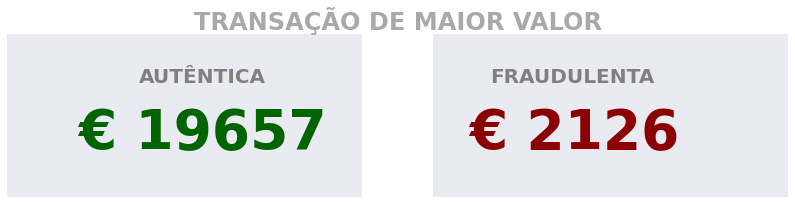

In [ ]:
maior_autentica = df['Amount'][df['Class']==0].max()
maior_fraude    = df['Amount'][df['Class']==1].max()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
fig.text(x= 0.31, y= 0.9 ,s='TRANSAÇÃO DE MAIOR VALOR',
        fontsize=24, color='darkgray', weight='bold')
ax1.text(x= 0.37, y= 0.7 ,s='AUTÊNTICA',
        fontsize=20, color='gray', weight='bold')
ax1.text(x= 0.2, y= 0.3 ,s=f'€ {maior_autentica:.0f}', fontsize=55, color='darkgreen', weight='bold')

ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.text(x= 0.16, y= 0.7 ,s='FRAUDULENTA',
        fontsize=20, color='gray', weight='bold')
ax2.text(x= 0.1, y= 0.3 ,s=f'€ {maior_fraude:.0f}', fontsize=55, color='darkred', weight='bold')

ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


Apesar de a média das transações fraudulentas ser maior...
Os maiores valores para o atributo Amount estão ocorrendo em transações autênticas.
Desta forma, a princípio esses valores discrepantes, ao serem normalizados, podem contribuir para o treinamento do modelo.

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no *dataframe*.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
* As colunas `Time` e `Amount` não estão normalizadas.

## Preparando os dados

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

* Padronizar as *features* `Time` e `Amount`, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [ ]:
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [ ]:
X = df_clean.drop('Class', axis=1)
y = df['Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

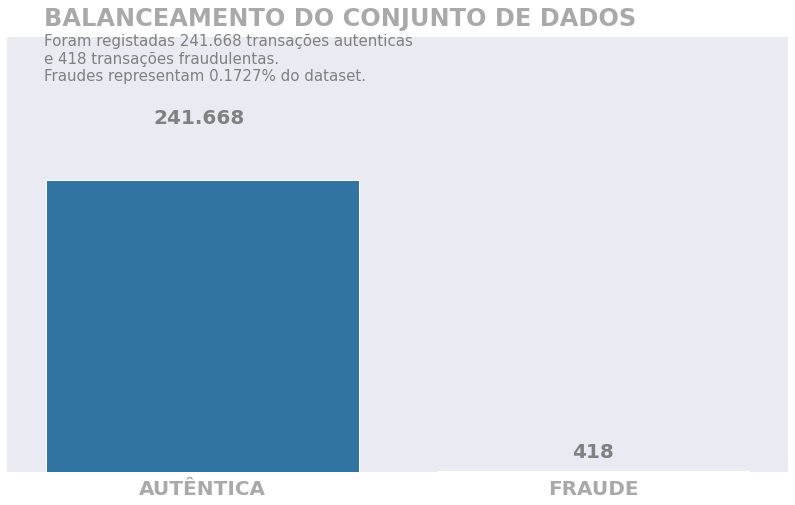

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(df['Class'])

autenticas = '{:,}'.format(int((df.Class ==0).sum())).replace(',','.')
fraudes    = '{:,}'.format(int((df.Class ==1).sum())).replace(',','.')

fig.text(x= 0.162 , y= 0.9 , s='BALANCEAMENTO DO CONJUNTO DE DADOS',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s=f'Foram registadas {autenticas} transações autenticas',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.835 , s=f'e {fraudes} transações fraudulentas.',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.805 , s='Fraudes representam 0.1727% do dataset.',
        fontsize=15, color='gray')

fig.text(x= 0.27 , y= 0.73 , s=autenticas,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.15 , s=fraudes,
        fontsize=20, color='gray', weight='bold')

ax.set_ylim(0, 360000)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['AUTÊNTICA', 'FRAUDE'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  O que chamou atenção no resumo estatístico separado por classes foi a diferença na quantidade de transações em cada uma das classes, fazendo com que o conjunto de dados fique desbalanceado. O desbalanceamento é comum em datasets como esse, que registram fraudes, visto que existem muito mais transações autênticas no cotidiano do que as fraudulentas.

## Modelo de Machine Learning
Os algoritmos de Machine Learning serão treinados utilizando 70% do conjunto de dados, e serão avaliados através os dados de teste que representam 30% do dataset. A primeira etapa busca encontrar os hiperparâmetros que obtenham o melhor AUC (Area Under the Curve) a partir dos dados de treino. Para entender a AUC é preciso começar pela Matriz de Confusão (Confusion Matrix).
<p align=center>
<img src="https://img.freepik.com/fotos-gratis/fundo-humano-do-aperto-de-mao-do-robo-era-digital-futurista_53876-129770.jpg?w=740" width="60%"></p>
Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.
Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.
Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna recall do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC)



Vamos instanciar e treinar um modelo de Regressão Logistica e fazer as previsões de teste.

In [ ]:
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)
x_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9907    0.0018    0.0035     60417
           1     0.0017    0.9905    0.0034       105

    accuracy                         0.0035     60522
   macro avg     0.4962    0.4961    0.0035     60522
weighted avg     0.9889    0.0035    0.0035     60522

Acurácia: 0.0035

AUC: 0.4961



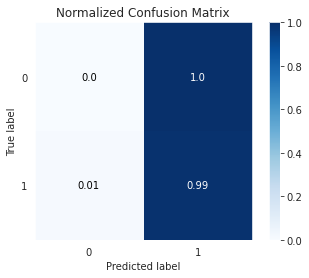

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna recall do Relatório de Classificação.

Uma outra métrica considerada interessante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 96% de AUC.

## Fazendo Previsões no Conjunto de Teste

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. 

Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera.

Nesse caso, precisamos padronizar as colunas Time e Amount. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber.


In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


0    313
1    313
Name: Class, dtype: int64


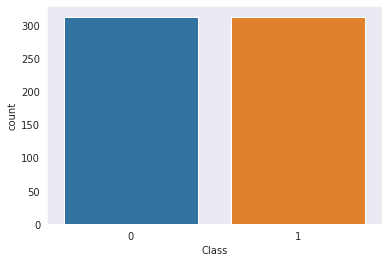

In [ ]:
rus = RandomUnderSampler()
X_rus,y_rus =rus.fit_resample(X_train,y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
balanceamento = RandomUnderSampler()

In [ ]:
norm = StandardScaler()

Agora basta separar entre X e Y, e fazer nossas previsões.

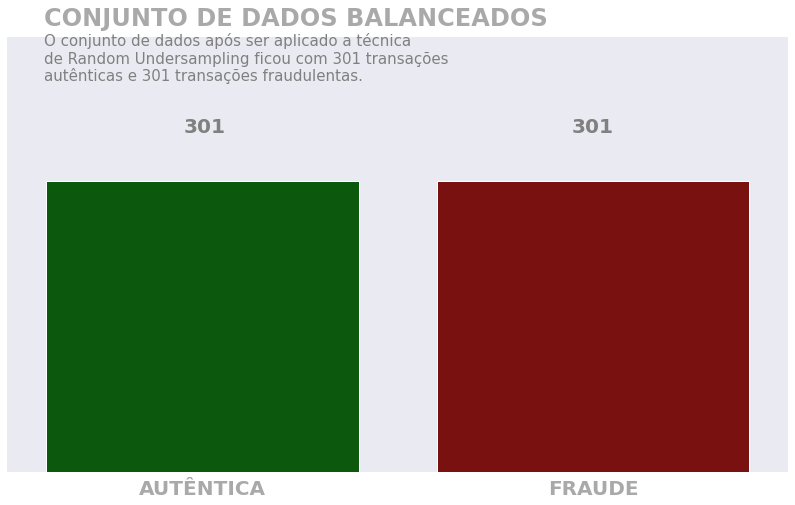

In [ ]:
# balanceando os dados de Treino
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

# Plotar a nova distribuição de classes
cor2 = {classe: "darkgreen" if classe == 0 else "darkred" for classe in y_train.unique()}
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y_train, palette=cor2, ax=ax)

autenticas = (y_train==0).sum()
fraudes    = (y_train==1).sum()

fig.text(x= 0.162 , y= 0.9 , s='CONJUNTO DE DADOS BALANCEADOS',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s='O conjunto de dados após ser aplicado a técnica',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.835 , s=f'de Random Undersampling ficou com {autenticas} transações',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.805 , s=f'autênticas e {fraudes} transações fraudulentas.',
        fontsize=15, color='gray')

fig.text(x= 0.3 , y= 0.715 , s=autenticas,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.715 , s=fraudes,
        fontsize=20, color='gray', weight='bold')


ax.set_ylim(0, 450)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['AUTÊNTICA', 'FRAUDE'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [ ]:
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus,y_rus)
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# Criando um normalizador usando o conjunto de treino
normalizador = StandardScaler().fit(X_train)

# Normalizando os dados de treino
x_train = normalizador.transform(X_train)

# Normalizando os dados de teste
x_test = normalizador.transform(X_test)

In [ ]:
modeloLR = LogisticRegression(penalty='l2', C=0.08, solver='liblinear')
modeloLR.fit(X_train, y_train)
y_predLR = modeloLR.predict(X_test)
y_probLR = modeloLR.predict_proba(X_test)[:,1]
print('-'*50)
print('          Resultado Logistic Regression')
print('-'*50)
print(classification_report(y_test, y_predLR, digits=4))
print(f'AUC: {roc_auc_score(y_test, y_predLR):.4f}')

--------------------------------------------------
          Resultado Logistic Regression
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9998    0.9812    0.9904     72509
           1     0.0695    0.8718    0.1287       117

    accuracy                         0.9810     72626
   macro avg     0.5346    0.9265    0.5595     72626
weighted avg     0.9983    0.9810    0.9890     72626

AUC: 0.9265


In [ ]:
from sklearn import preprocessing

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9726    0.9860     60417
           1     0.0505    0.8381    0.0952       105

    accuracy                         0.9724     60522
   macro avg     0.5251    0.9054    0.5406     60522
weighted avg     0.9981    0.9724    0.9844     60522

Acurácia: 0.9724

AUC: 0.9054



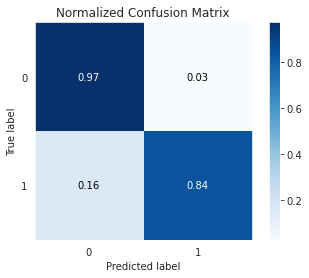

In [ ]:
# Plotagem da Matriz de Confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

In [ ]:
# separar variáveis entre X e y
X = df.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9983    0.9712    0.9846     60417
           1     0.0029    0.0476    0.0054       105

    accuracy                         0.9696     60522
   macro avg     0.5006    0.5094    0.4950     60522
weighted avg     0.9966    0.9696    0.9829     60522

Acurácia: 0.9696

AUC: 0.5094



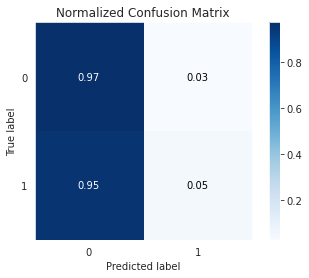

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

In [ ]:
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


## separar variáveis entre X e y ##

In [ ]:
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [ ]:
df_corr = df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.118457,-0.010616,-0.419641,-0.105103,0.175300,-0.064958,0.086161,-0.036932,-0.009838,...,0.045708,0.144001,0.050465,-0.015890,-0.232211,-0.041341,-0.005502,-0.009517,-0.010888,-0.012811
V1,0.118457,1.000000,-0.003221,-0.002048,0.001286,-0.002737,0.005445,0.007720,-0.000954,0.001276,...,-0.004866,0.001407,0.001084,0.002182,0.001429,0.002493,0.014357,-0.002697,-0.226873,-0.103091
V2,-0.010616,-0.003221,1.000000,-0.004338,0.000599,-0.007803,0.005961,0.003115,-0.003988,0.001673,...,-0.010503,0.002437,-0.000225,0.001347,0.002197,0.002980,0.013823,-0.000292,-0.535137,0.092597
V3,-0.419641,-0.002048,-0.004338,1.000000,0.001527,-0.005832,0.008002,0.011766,-0.001444,-0.000116,...,-0.005602,0.000467,0.000171,-0.000078,0.000581,0.001249,0.012716,-0.003521,-0.204736,-0.194432
V4,-0.105103,0.001286,0.000599,0.001527,1.000000,0.002608,-0.001654,-0.002743,0.001010,0.000404,...,0.003134,-0.001751,-0.000460,0.000518,-0.001973,-0.002080,-0.007137,0.002765,0.098261,0.132855
V5,0.175300,-0.002737,-0.007803,-0.005832,0.002608,1.000000,0.011409,0.027023,-0.003474,-0.001668,...,-0.008139,0.001810,0.000703,0.001788,0.002136,0.002251,0.017769,-0.007553,-0.370035,-0.099248
V6,-0.064958,0.005445,0.005961,0.008002,-0.001654,0.011409,1.000000,-0.017140,0.001701,-0.000275,...,0.003050,-0.000092,0.000057,-0.001212,-0.003953,-0.000941,-0.011568,0.004642,0.201013,-0.042852
V7,0.086161,0.007720,0.003115,0.011766,-0.002743,0.027023,-0.017140,1.000000,0.011662,0.002945,...,0.014209,-0.002891,0.001995,-0.002281,-0.002655,-0.001277,-0.020956,0.004633,0.378089,-0.191235
V8,-0.036932,-0.000954,-0.003988,-0.001444,0.001010,-0.003474,0.001701,0.011662,1.000000,0.002238,...,0.004262,-0.002544,-0.000851,0.000980,0.003707,0.000899,0.009590,-0.003871,-0.097466,0.019612
V9,-0.009838,0.001276,0.001673,-0.000116,0.000404,-0.001668,-0.000275,0.002945,0.002238,1.000000,...,-0.001278,0.000557,-0.001020,0.000143,0.000122,-0.000088,0.000763,-0.000136,-0.044716,-0.097159


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9907    0.0018    0.0035     60417
           1     0.0017    0.9905    0.0034       105

    accuracy                         0.0035     60522
   macro avg     0.4962    0.4961    0.0035     60522
weighted avg     0.9889    0.0035    0.0035     60522

Acurácia: 0.0035

AUC: 0.4961



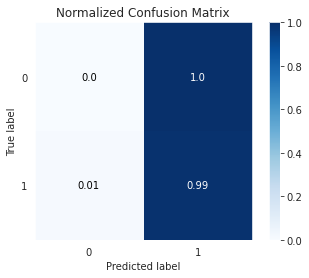

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Esses resultados houve uma difernça de dados com o cojunto de validação ,oque mostra um bom resultado.

## Conclusões
Apesar de os dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.


